Descriptive analysis

In [2]:
import pandas as pd



In [3]:
df=pd.read_csv("..\\Data\\output.csv", low_memory=False)

In [4]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [5]:
numerical_col=['TotalPremium','TotalClaims']
numerical_summery=df[numerical_col].describe()
numerical_summery

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


VARIBILITY ANALYSIS

In [6]:

variability = df[numerical_col].agg(['std', 'var', 'min', 'max', lambda x: x.max() - x.min()])
variability.rename(index={'<lambda>': 'range'}, inplace=True)

print("\nVariability:\n", variability)



Variability:
        TotalPremium   TotalClaims
std      230.284513  2.384075e+03
var    53030.956816  5.683812e+06
min     -782.576754 -1.200241e+04
max    65282.603421  3.930921e+05
range  66065.180175  4.050945e+05


In [7]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

List of categorical columns

In [8]:
categorical_columns = [
    'UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered',
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
    'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
    'make', 'Model', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice',
    'NewVehicle', 'CrossBorder',
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
    'StatutoryClass', 'StatutoryRiskType'
]

df[categorical_columns] = df[categorical_columns].astype('category')

print(df.dtypes)


UnderwrittenCoverID         category
PolicyID                    category
TransactionMonth            category
IsVATRegistered             category
Citizenship                 category
LegalType                   category
Title                       category
Language                    category
Bank                        category
AccountType                 category
MaritalStatus               category
Gender                      category
Country                     category
Province                    category
PostalCode                  category
MainCrestaZone              category
SubCrestaZone               category
ItemType                    category
mmcode                      category
VehicleType                 category
RegistrationYear               int64
make                        category
Model                       category
Cylinders                    float64
cubiccapacity                float64
kilowatts                    float64
bodytype                    category
N

MISSING VALUE

In [9]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print("Missing Values Summary:\n", missing_summary)


Missing Values Summary:
                           Missing Values  Percentage (%)
NumberOfVehiclesInFleet          1000098      100.000000
CrossBorder                       999400       99.930207
CustomValueEstimate               779642       77.956560
Rebuilt                           641901       64.183810
Converted                         641901       64.183810
WrittenOff                        641901       64.183810
NewVehicle                        153295       15.327998
Bank                              145961       14.594670
AccountType                        40232        4.022806
Gender                              9536        0.953507
MaritalStatus                       8259        0.825819
VehicleType                          552        0.055195
make                                 552        0.055195
mmcode                               552        0.055195
Model                                552        0.055195
Cylinders                            552        0.055195
bodyty

In [10]:
for col in ['cubiccapacity','bodytype','Cylinders','Model','NumberOfDoors','kilowatts', 'VehicleIntroDate','CapitalOutstanding']:
     df[col]=df[col].fillna(df[col].mode()[0])


In [11]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

univarite analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


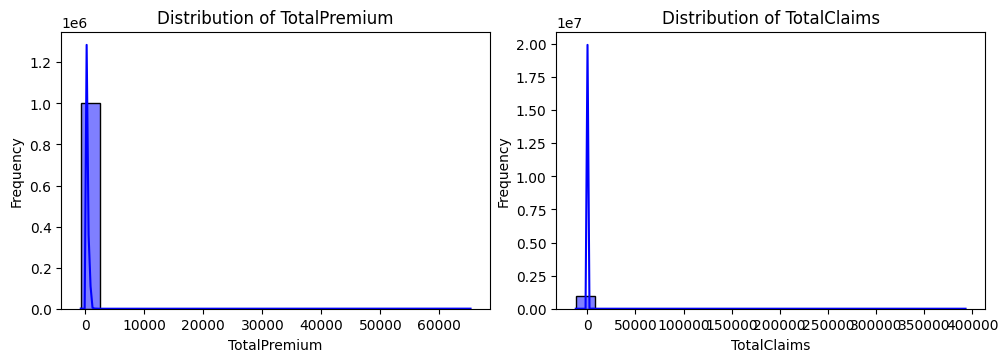

In [13]:

numerical_columns = ['TotalPremium', 'TotalClaims']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3,i)  # Arrange histograms in a grid
    sns.histplot(df[col], kde=True, bins=20, color='blue')  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


catagorical Data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


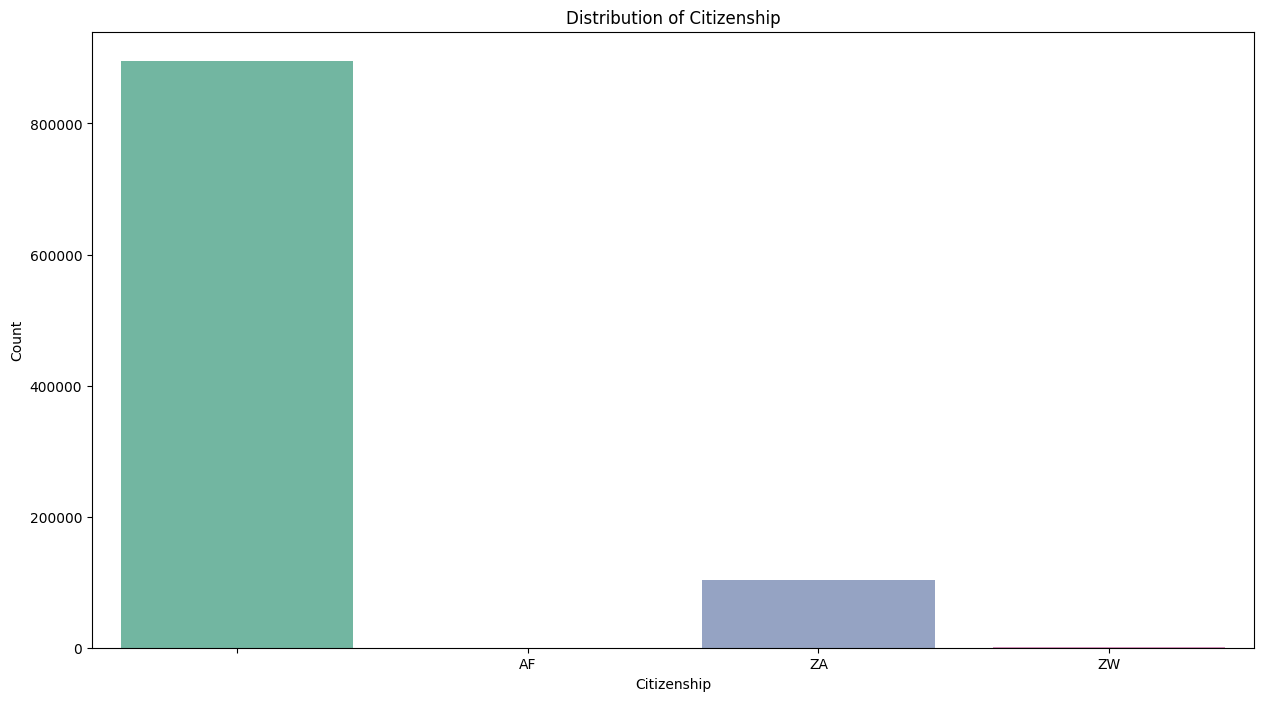

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


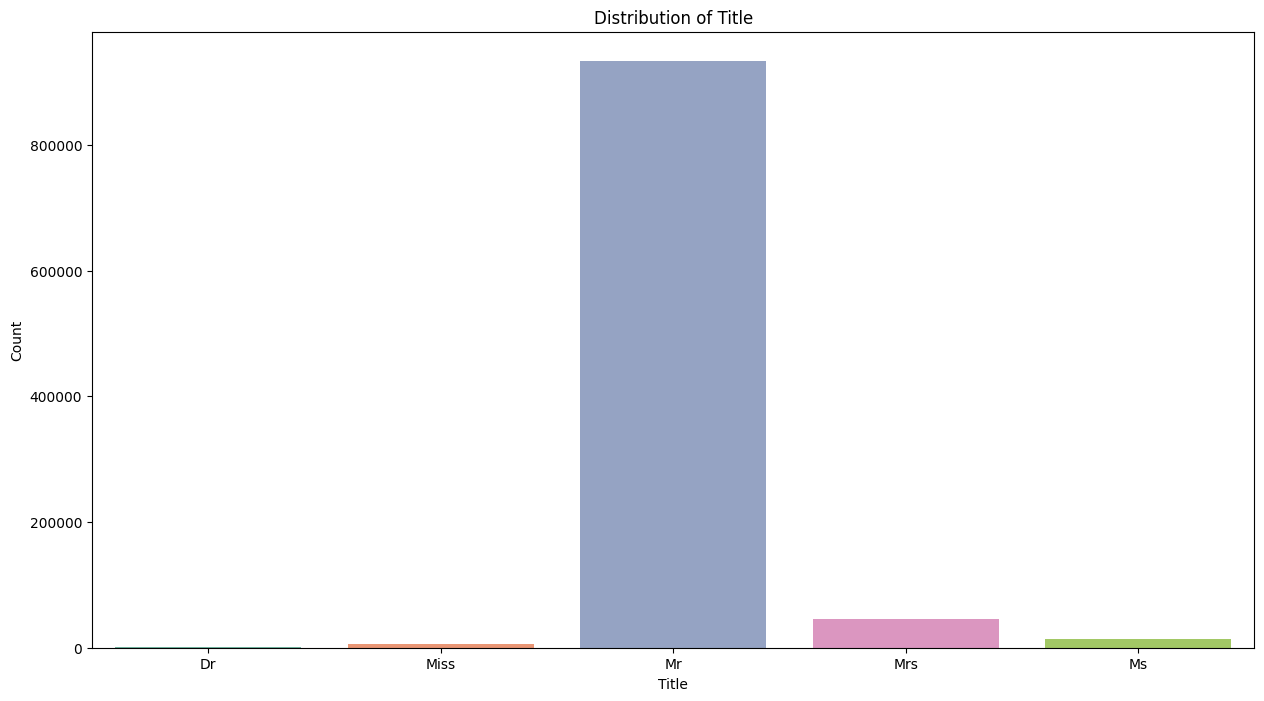

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


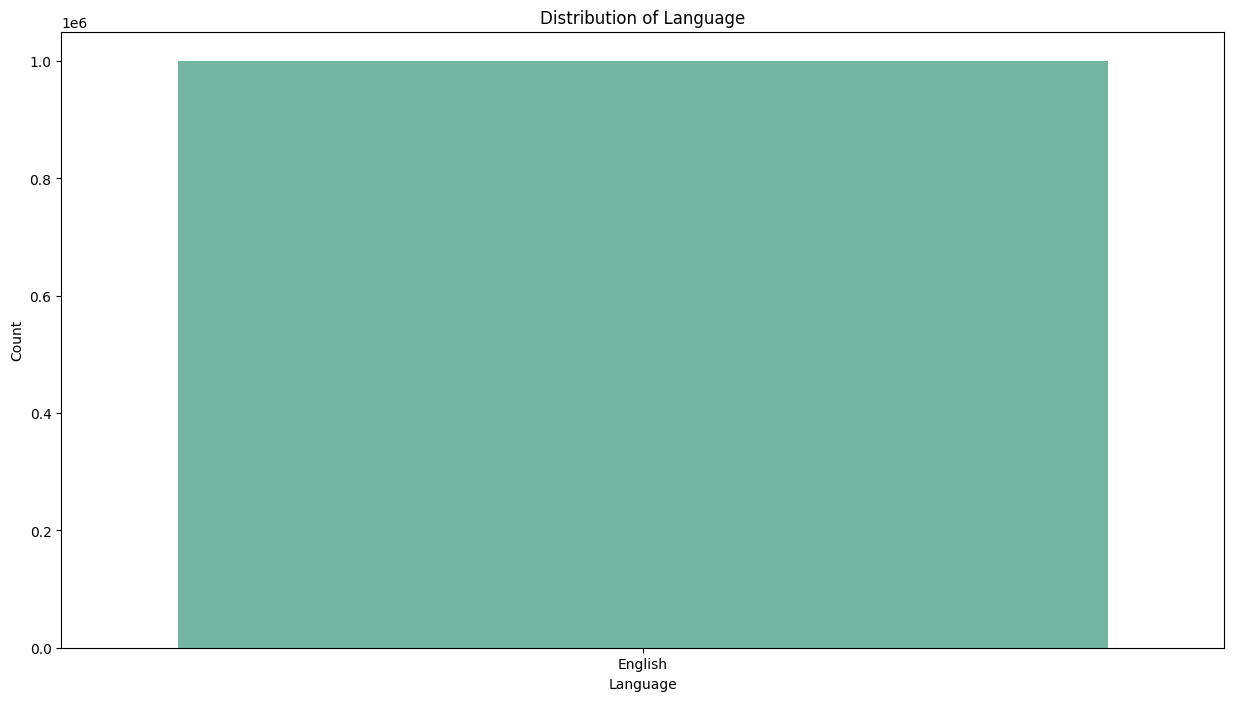

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


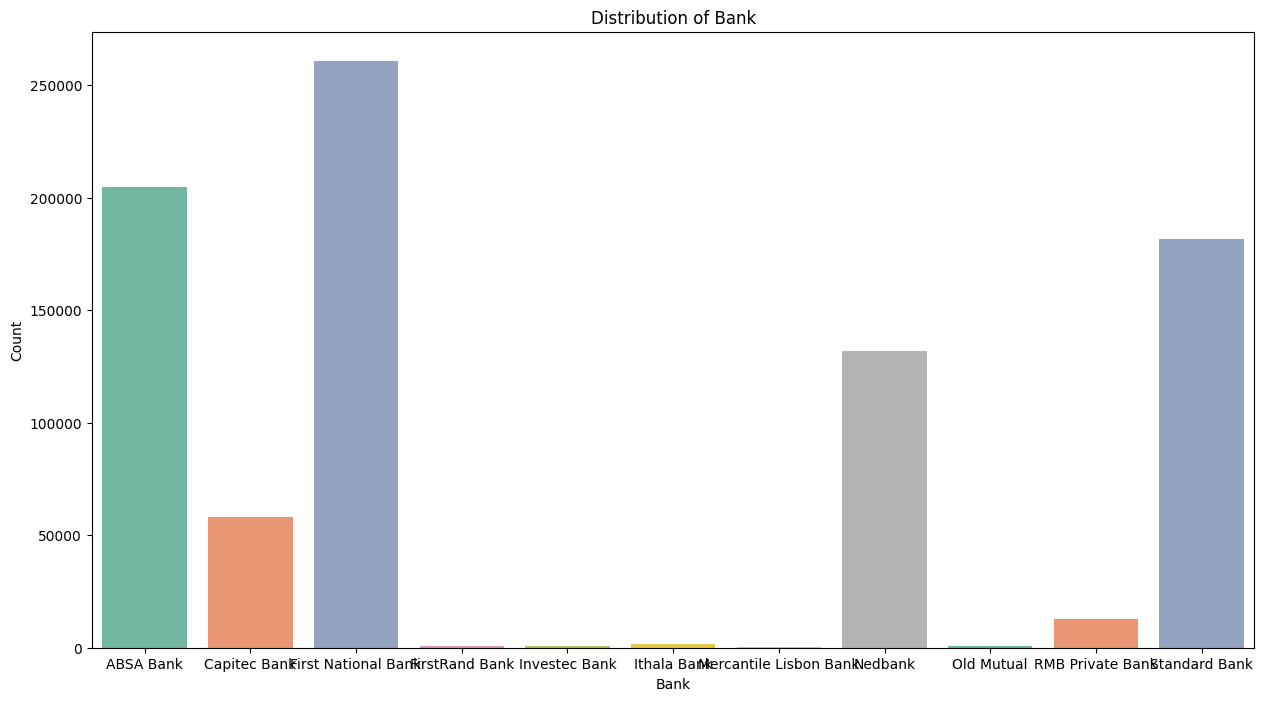

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


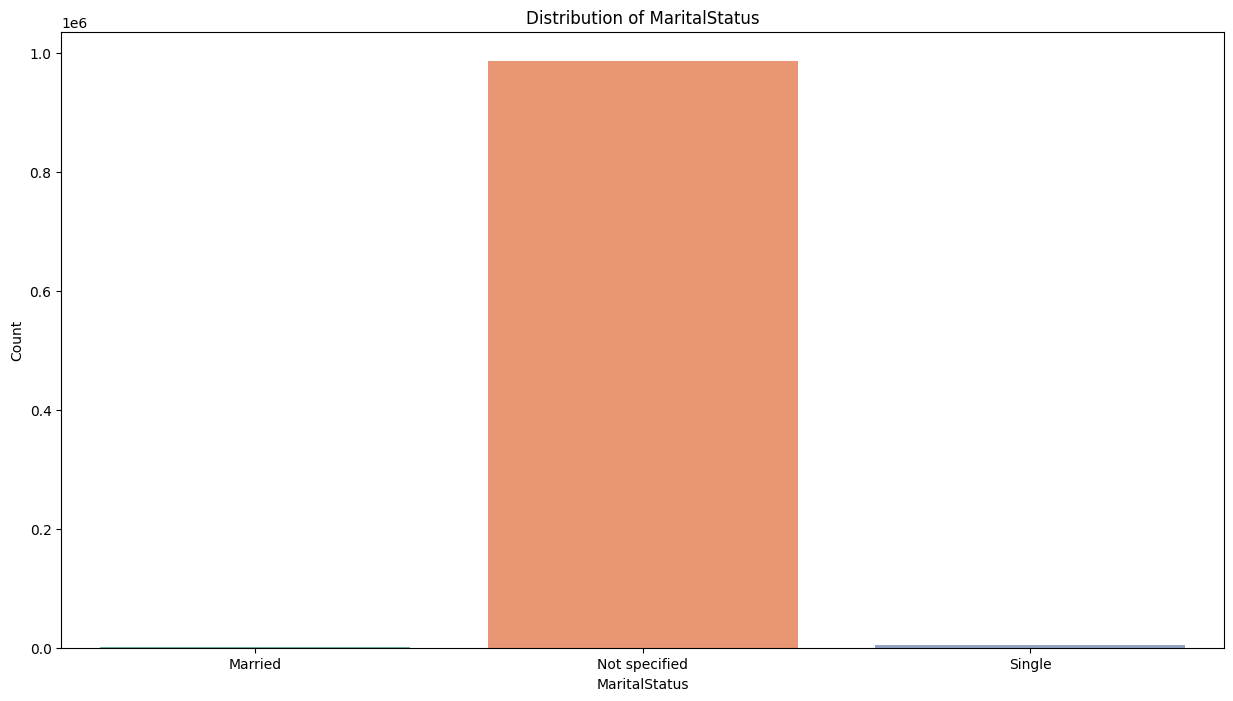

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


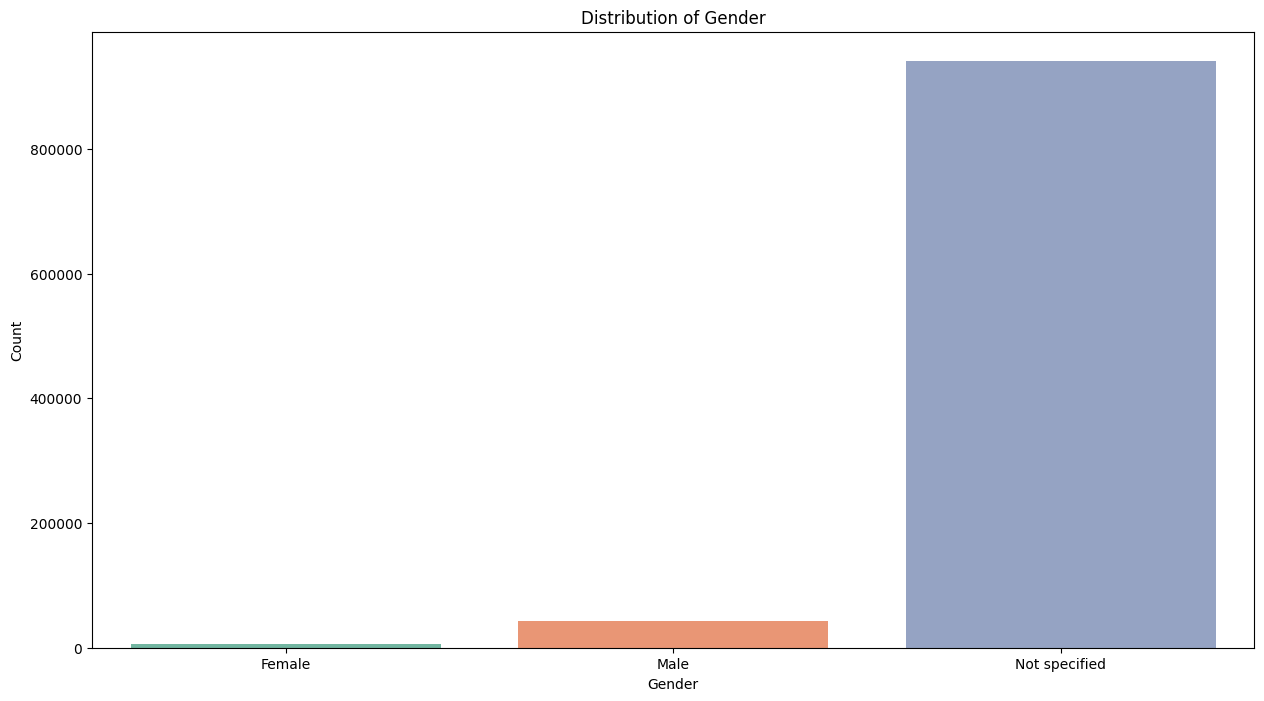

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


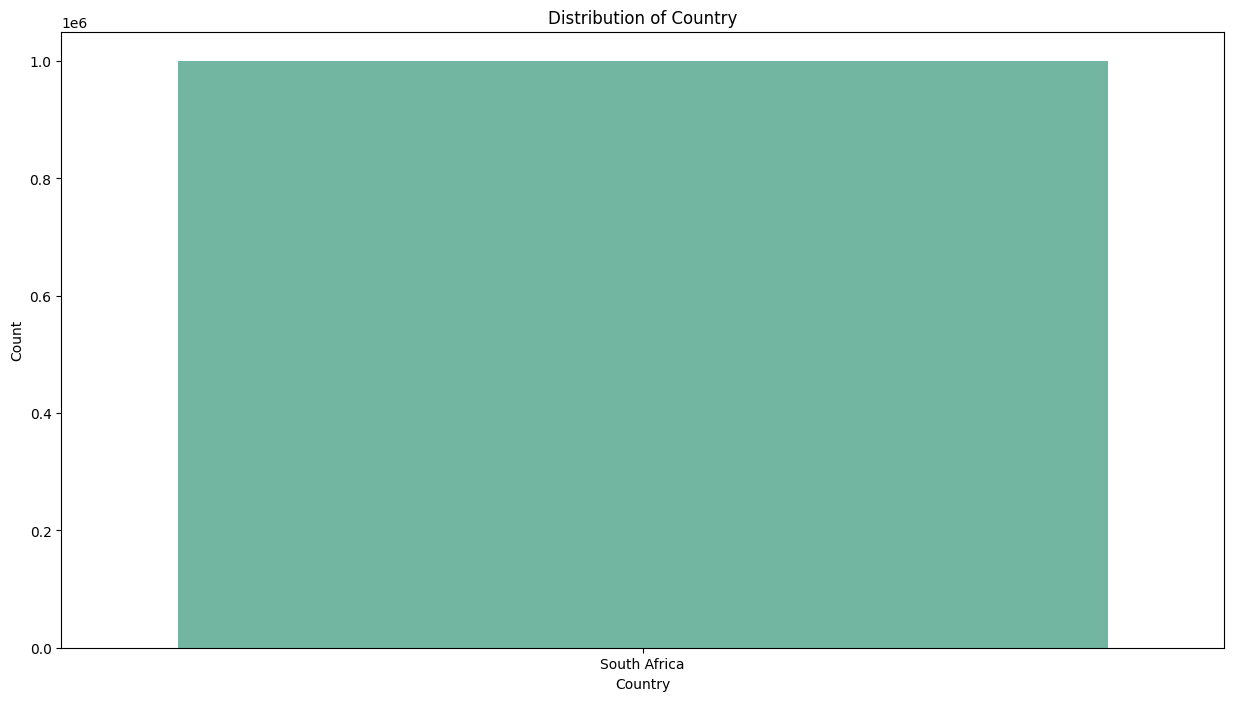

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


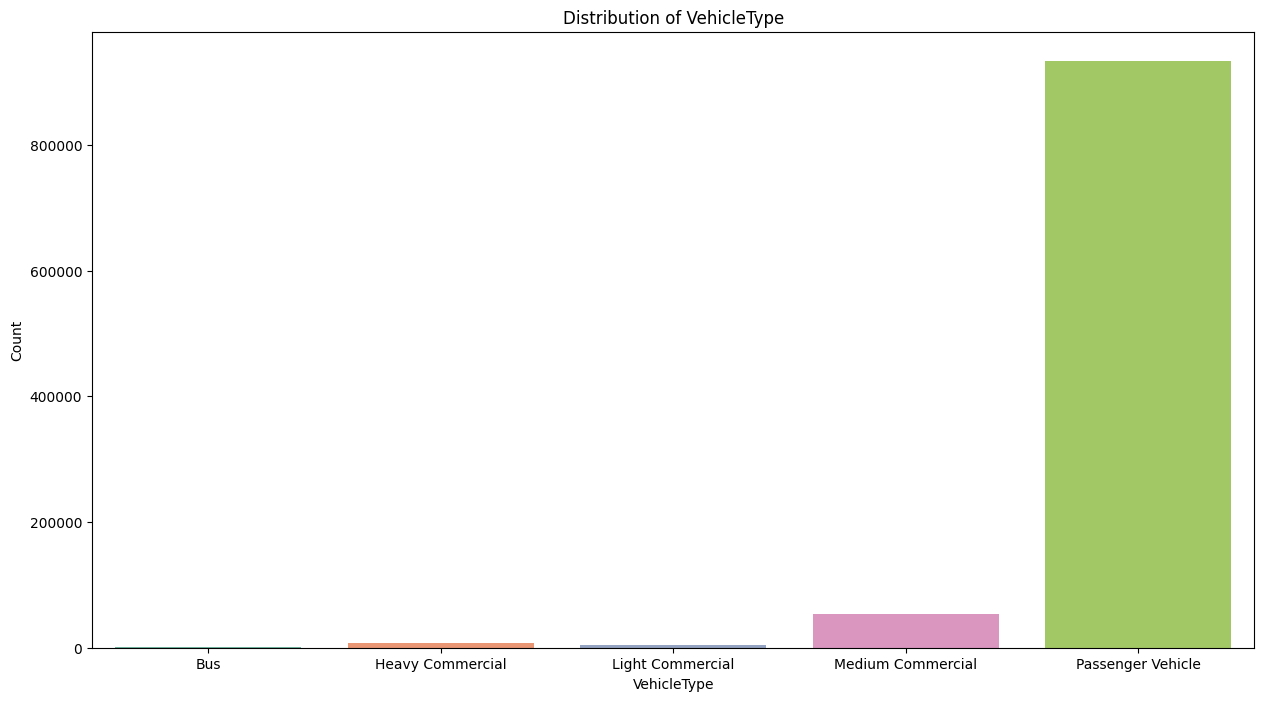

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\775980474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Bar chart


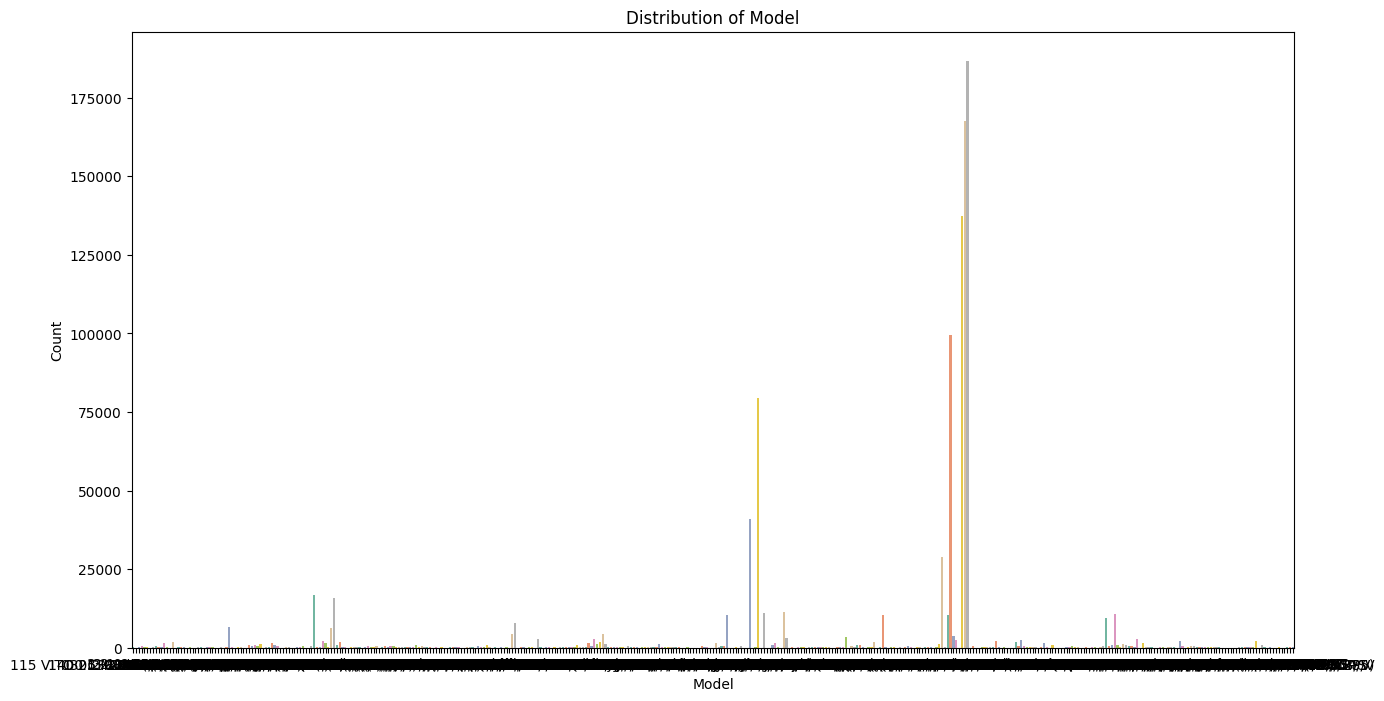

In [16]:
# List of categorical columns (replace with your actual categorical columns)
categorical_columns = ['Citizenship', 'Title', 'Language', 'Bank',
    'MaritalStatus', 'Gender', 'Country', 'VehicleType', 'Model']

# Plot bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(15, 8))  # Set the figure size
    sns.countplot(data=df, x=col, palette='Set2')  # Bar chart
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

BIVARITE ANALYSIS

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\791916910.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', palette='Set2', alpha=0.7)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\791916910.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position


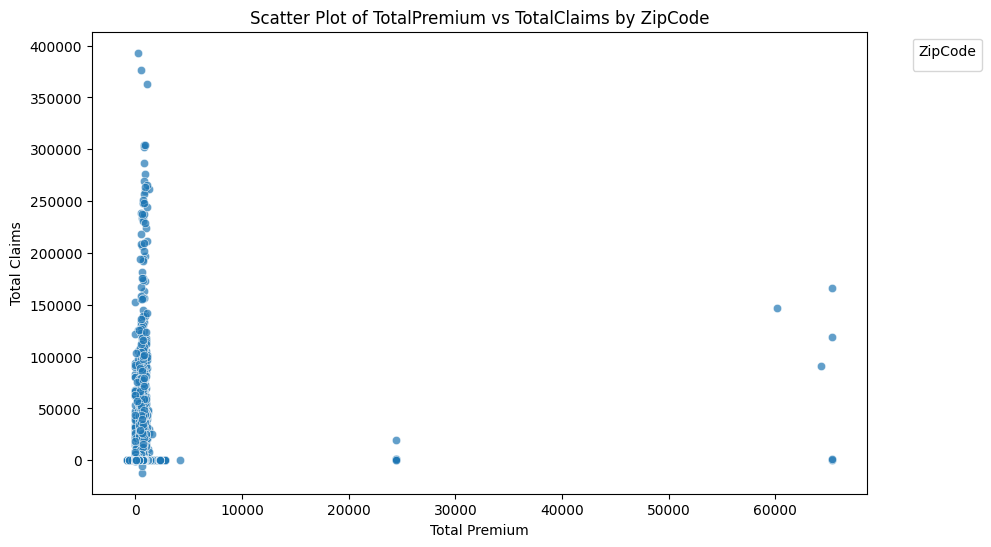

In [19]:


# Scatter plot for TotalPremium vs. TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', palette='Set2', alpha=0.7)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


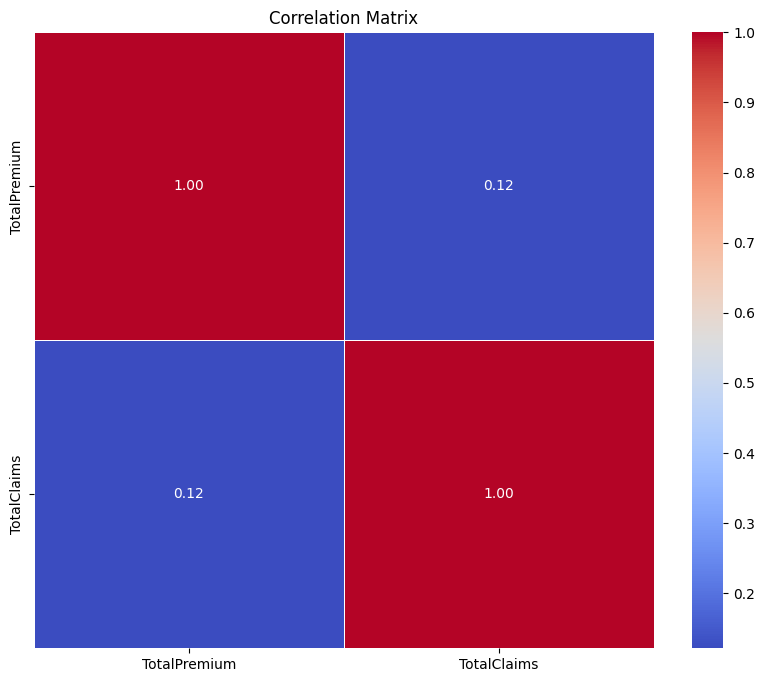

In [20]:
# Select numerical columns for correlation analysis
correlation_columns = ['TotalPremium', 'TotalClaims',]
corr_matrix = df[correlation_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [28]:
import pandas as pd
import numpy as np

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\2126993684.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_grouped = df.groupby(['ZipCode', 'TransactionMonth'])[['TotalPremium', 'TotalClaims']].mean().reset_index()


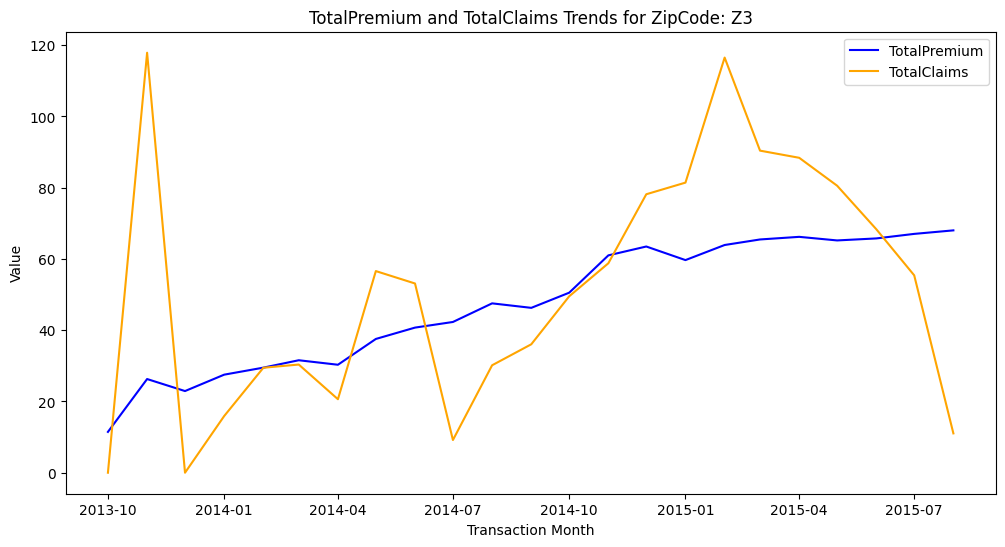

In [29]:
# Add a dummy ZipCode column if it doesn't exist
if 'ZipCode' not in df.columns:
    df['ZipCode'] = np.random.choice(['Z1', 'Z2', 'Z3'], size=len(df))  # Example values

# Ensure 'TransactionMonth' is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Group by ZipCode and TransactionMonth, then calculate monthly means
monthly_grouped = df.groupby(['ZipCode', 'TransactionMonth'])[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Plot TotalPremium and TotalClaims over time for a sample ZipCode
sample_zip = df['ZipCode'].value_counts().idxmax()  # Choose the most frequent ZipCode
zip_data = monthly_grouped[monthly_grouped['ZipCode'] == sample_zip]

plt.figure(figsize=(12, 6))
sns.lineplot(data=zip_data, x='TransactionMonth', y='TotalPremium', label='TotalPremium', color='blue')
sns.lineplot(data=zip_data, x='TransactionMonth', y='TotalClaims', label='TotalClaims', color='orange')
plt.title(f'TotalPremium and TotalClaims Trends for ZipCode: {sample_zip}')
plt.xlabel('Transaction Month')
plt.ylabel('Value')
plt.legend()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8856\856665129.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=grouped, x='TotalPremium', y='TotalClaims', palette='viridis', s=100)


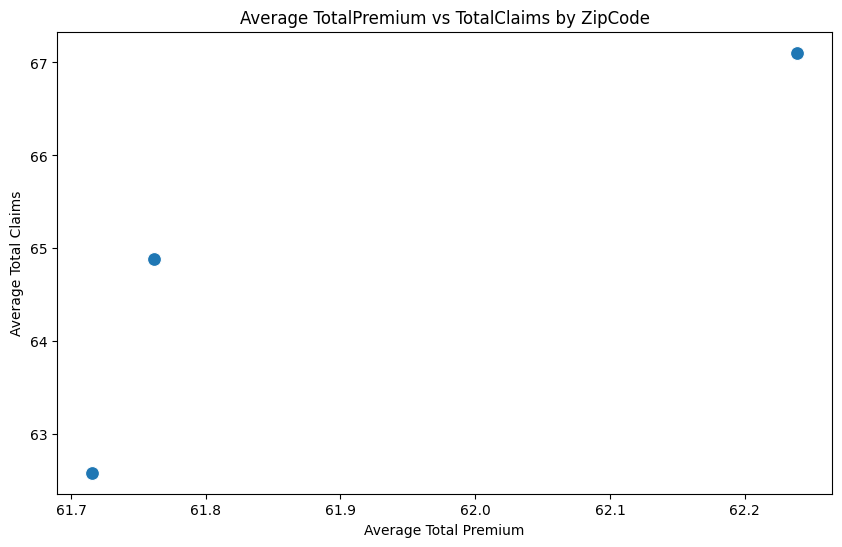

In [30]:
# Example: Group by ZipCode and calculate mean TotalPremium and TotalClaims
grouped = df.groupby('ZipCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Scatter plot for grouped data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped, x='TotalPremium', y='TotalClaims', palette='viridis', s=100)
plt.title('Average TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('Average Total Premium')
plt.ylabel('Average Total Claims')
plt.show()
